## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_rmsedist.csv'] 

In [4]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv':'2024_10_07_randomSampleV3', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv':'2024_10_04_RandomBaseline_v2', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv':'2024_10_17_RandomBaselineV4',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_apdist.csv':'2024_12_09_OptComp1_apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_rmsedist.csv':'2024_12_09_OptComp1_rmse'
          }



## split apdist and rmse uuids

In [5]:
random_files = ['2024_10_07_randomSampleV3', '2024_10_04_RandomBaseline_v2', '2024_10_17_RandomBaselineV4']
apdist_files = ['2024_12_09_OptComp1_apdist']
rmse_files = ['2024_12_09_OptComp1_rmse']

In [6]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [7]:
len(rmse_uuids)

20

In [8]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0,4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,A1,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
1,1,a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,A2,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
2,2,3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,A3,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
3,3,0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,A4,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
4,4,68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,A5,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,C2,2024_12_09_OptComp1_rmse,0.0,1700.0,E8
16,16,8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,C3,2024_12_09_OptComp1_rmse,1288.0,412.0,F1
17,17,3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,C4,2024_12_09_OptComp1_rmse,0.0,1700.0,F2
18,18,823420a0-9489-4474-98b7-8002db0ccdfa,45.910634,148.858152,171.079487,1334.151727,0.826528,7.268961,0.008822,C5,2024_12_09_OptComp1_rmse,295.0,1405.0,F3


In [9]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol'], axis = 1)

In [10]:
synth_table = synth_table.set_index('uuid')

In [11]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well
uuid,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN
...,...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,2024_12_09_OptComp1_rmse,E8
8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,2024_12_09_OptComp1_rmse,F1
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,2024_12_09_OptComp1_rmse,F2


## Get volume fractions

In [12]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [13]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [14]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [15]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,2024_12_09_OptComp1_rmse,E8,1700.0,0.010000,0.005000,0.150000,0.835000
8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,2024_12_09_OptComp1_rmse,F1,1700.0,0.092023,0.043697,0.044468,0.819812
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,2024_12_09_OptComp1_rmse,F2,1700.0,0.010000,0.005000,0.094064,0.890936


In [16]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [17]:
distance_results = pd.read_csv('distance_results_comparisonOptRound1.csv')

In [18]:
distance_results = distance_results.set_index('uuid')

In [19]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,0,0.722325,0.567682,1.290007,0.234224,73.262381,1.000000,success
a180d359-a229-4b3e-a615-2991fd549f42,1,1.035157,0.515580,1.550737,0.226918,100.922977,0.722970,success
3584700a-8b01-4e59-a53a-1300fd3fac0a,2,0.918022,0.467817,1.385839,0.240399,96.631829,0.704364,success
0e6edb88-77c3-4984-a38d-198341bba9e1,3,0.932813,0.572014,1.504827,0.232926,93.463489,0.718000,success
68831f53-4a51-4f12-b385-10c50c8fab46,4,1.091741,0.541297,1.633039,0.227138,94.828557,0.695253,success
...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,117,1.199332,0.502743,1.702075,1.129595,16.519831,0.464380,success
8ba0c6b7-3832-481e-bb23-e1c1513e39da,118,NaN,NaN,NaN,NaN,NaN,NaN,failed
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,119,1.279936,0.480092,1.760028,1.345274,13.195812,0.429406,success


In [20]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


4bec4e18-80bb-44d9-8508-cc464f14b287
a180d359-a229-4b3e-a615-2991fd549f42
3584700a-8b01-4e59-a53a-1300fd3fac0a
0e6edb88-77c3-4984-a38d-198341bba9e1
68831f53-4a51-4f12-b385-10c50c8fab46
fed3ab35-04e9-4916-8527-8627191a3bdc
32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9
a4d8a8f6-2654-490f-b14a-02d3fb1f94b2
770a433d-0480-4cee-bf12-ce066c24db55
41414be7-3e27-4b4d-b70e-e31d54a733d3
6b50a94f-b7f2-402e-a210-e89f507b8861
fa1dfc55-e5e0-4514-a66a-e29a5351518a
ef17f542-90a3-44a8-a6b8-acb920953fab
23850c30-c572-41ad-abf0-7e1bd4fa7397
4ab46dcc-3395-4e7b-bb87-52e805e12abb
657e707f-abc9-4f86-ae1e-9e59efb6e1f9
96ef6012-d812-4975-8b77-8ed7e78669fb
e0368e49-ecc3-4ebf-9a19-4e942c829517
d03dab18-5712-44f7-9334-14047212632e
4d5fd07b-987b-49df-b4ba-54d2a337d945
6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd
8559907a-1b27-4673-ae0e-602b83d86deb
b683d769-9cd7-454a-b546-4e86afe5e3f4
a6974af8-5b2d-431a-94df-d35c0be3ee54
81f8f6c2-0e42-4680-bc11-c0be02bfd641
f5e32498-0689-4e74-9a45-9c17edf776b9
1c809d50-4605-4865-aa13-13649203ede8
f

In [21]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [22]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,2024_12_09_OptComp1_rmse,E8,1700.0,0.010000,0.005000,0.150000,0.835000,1.702075,1.129595,complete
8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,2024_12_09_OptComp1_rmse,F1,1700.0,0.092023,0.043697,0.044468,0.819812,2.466455,1.684663,complete
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,2024_12_09_OptComp1_rmse,F2,1700.0,0.010000,0.005000,0.094064,0.890936,1.760028,1.345274,complete


## Split out RMSE and APDist results

In [23]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [24]:
len(rmse_samples)

120

In [25]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,2024_12_09_OptComp1_rmse,E8,1700.0,0.010000,0.005000,0.150000,0.835000,1.702075,1.129595,complete
8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,2024_12_09_OptComp1_rmse,F1,1700.0,0.092023,0.043697,0.044468,0.819812,2.466455,1.684663,complete
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,2024_12_09_OptComp1_rmse,F2,1700.0,0.010000,0.005000,0.094064,0.890936,1.760028,1.345274,complete


In [26]:
rmse_samples

['4bec4e18-80bb-44d9-8508-cc464f14b287',
 'a180d359-a229-4b3e-a615-2991fd549f42',
 '3584700a-8b01-4e59-a53a-1300fd3fac0a',
 '0e6edb88-77c3-4984-a38d-198341bba9e1',
 '68831f53-4a51-4f12-b385-10c50c8fab46',
 'fed3ab35-04e9-4916-8527-8627191a3bdc',
 '32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9',
 'a4d8a8f6-2654-490f-b14a-02d3fb1f94b2',
 '770a433d-0480-4cee-bf12-ce066c24db55',
 '41414be7-3e27-4b4d-b70e-e31d54a733d3',
 '6b50a94f-b7f2-402e-a210-e89f507b8861',
 'fa1dfc55-e5e0-4514-a66a-e29a5351518a',
 'ef17f542-90a3-44a8-a6b8-acb920953fab',
 '23850c30-c572-41ad-abf0-7e1bd4fa7397',
 '4ab46dcc-3395-4e7b-bb87-52e805e12abb',
 '657e707f-abc9-4f86-ae1e-9e59efb6e1f9',
 '96ef6012-d812-4975-8b77-8ed7e78669fb',
 'e0368e49-ecc3-4ebf-9a19-4e942c829517',
 'd03dab18-5712-44f7-9334-14047212632e',
 '4d5fd07b-987b-49df-b4ba-54d2a337d945',
 '6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd',
 '8559907a-1b27-4673-ae0e-602b83d86deb',
 'b683d769-9cd7-454a-b546-4e86afe5e3f4',
 'a6974af8-5b2d-431a-94df-d35c0be3ee54',
 '81f8f6c2-0e42-

In [27]:
'0ec1c475-cfcb-4825-99d1-8aa99d749a94' == '0ec1c475-cfcb-4825-99d1-8aa99d749a94'

True

In [41]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [42]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [43]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

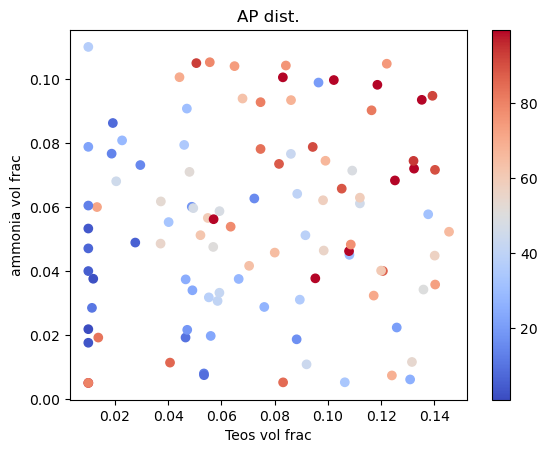

In [44]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

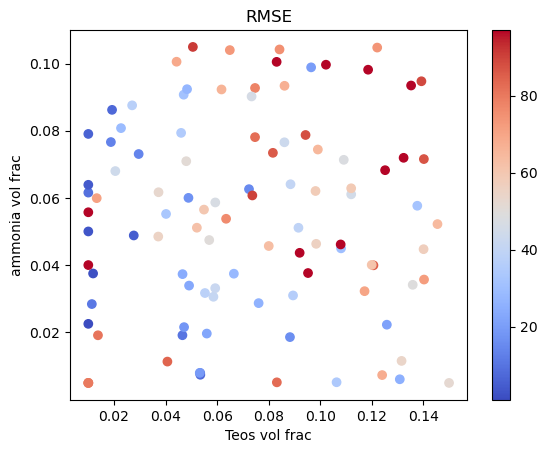

In [45]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [46]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [47]:
best_distances = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


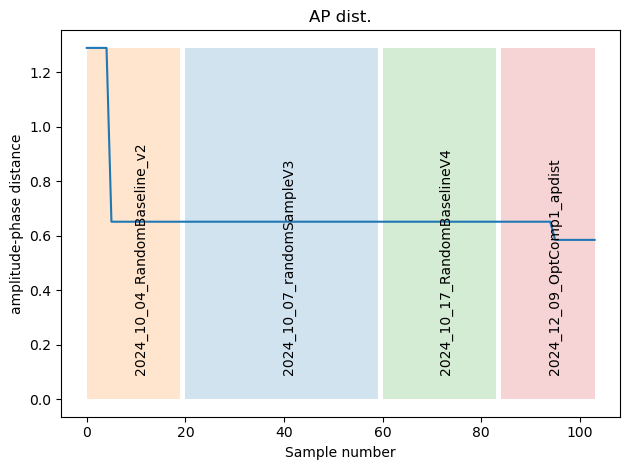

In [48]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [49]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [50]:
best_distances = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


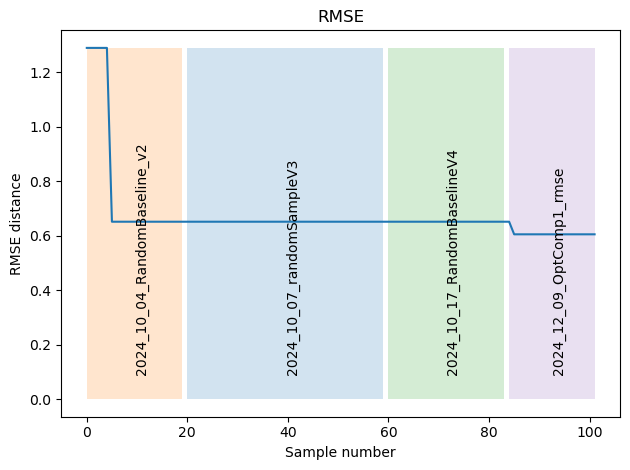

In [55]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('RMSE distance')
ax.set_title('RMSE')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [52]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete,14.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete,58.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete,23.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete,45.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0007687-faec-4deb-b4ea-a9e12ef0c229,17.000000,8.500000,255.000010,1419.499990,2.232143,2.691584,0.003272,2024_12_09_OptComp1_rmse,E8,1700.0,0.010000,0.005000,0.150000,0.835000,1.702075,1.129595,complete,77.0
8ba0c6b7-3832-481e-bb23-e1c1513e39da,156.438771,74.285032,75.595474,1393.680723,0.242564,24.768711,0.030328,2024_12_09_OptComp1_rmse,F1,1700.0,0.092023,0.043697,0.044468,0.819812,2.466455,1.684663,complete,97.0
3d7aafbc-c0a5-497f-aef7-762b42bea8b2,17.000000,8.500000,159.909378,1514.590623,2.232143,2.691584,0.003319,2024_12_09_OptComp1_rmse,F2,1700.0,0.010000,0.005000,0.094064,0.890936,1.760028,1.345274,complete,80.0


In [60]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

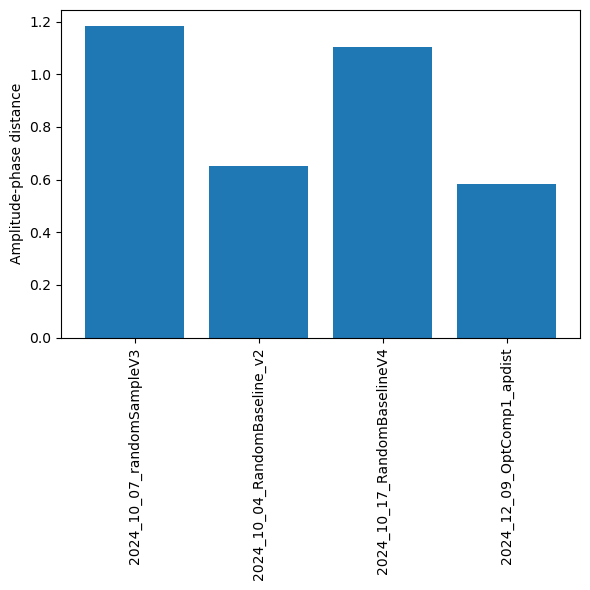

In [62]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [65]:
synth_table_apdist.to_csv('synth_table_12_09_24_apdist.csv')
synth_table_rmse.to_csv('synth_table_12_09_24_rmse.csv')